BRITISH AIRWAYS ANALYSIS
---


In [1]:
#import packages

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format 
np.set_printoptions(suppress=True, precision=5)

## <center><h2>Classification booking completion <h2><center>
---

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pd.options.display.float_format = "{:.3f}".format

In [3]:
#Import data
df = pd.read_csv(r'E:\learn st new\british airways theforage\customer_booking.csv', encoding ='latin1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.520,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.520,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.520,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.520,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.520,0


In [4]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [6]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

sales_channel
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64



In [7]:
labelencoder = LabelEncoder()
df['sales_channel'] = labelencoder.fit_transform(df['sales_channel'])
df['trip_type'] =labelencoder.fit_transform(df['trip_type'])
df['flight_day'] =labelencoder.fit_transform(df['flight_day'])
df['route'] = labelencoder.fit_transform(df['route'])
df['booking_origin'] =labelencoder.fit_transform(df['booking_origin'])

#8 dữ liệu encoding

In [18]:
# pipeline featuring

cat_features = ['sales_channel','trip_type','flight_day','route','booking_origin']

num_features = ['num_passengers','purchase_lead','length_of_stay', 'flight_hour', 'flight_duration', 'wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']

features = num_features + cat_features
X = df.drop(["booking_complete"], axis=1)[features]
y = df["booking_complete"]

In [20]:
X = pd.get_dummies(data = X, prefix = cat_features, columns = cat_features)

In [25]:
print(f'target proportion: {sum(y)/len(y):.4f}')

target proportion: 0.1496


In [27]:
# Do dữ liệu bị mất cân bằng, cần tăng số lượng dữ liệu để tránh imbalance
from imblearn.over_sampling import SMOTE

# Smote
smote = SMOTE(random_state= None ,k_neighbors= 5)

x, y = smote.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X.shape}''')

print('\nBalance of positive and negative classes (%):')
y.value_counts()

Shape of X before SMOTE: (50000, 923)
Shape of X after SMOTE: (50000, 923)

Balance of positive and negative classes (%):


0    42522
1    42522
Name: booking_complete, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 50
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.25, random_state= RANDOM_STATE)
print("Variables in Train Set : {} & Test Set : {}".format(len(x_train), len(x_test)))

Variables in Train Set : 63783 & Test Set : 21261


In [31]:
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

target proportion: 0.4992


----------

In [34]:
DT_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
RF_model= RandomForestClassifier(random_state=RANDOM_STATE,n_jobs=-1)
LR_model= LogisticRegression(random_state=RANDOM_STATE,n_jobs=-1)
XGB_model = XGBClassifier(random_state=RANDOM_STATE, n_jobs=-1)
model = [DT_model, RF_model, LR_model, XGB_model]

In [39]:
for i in range(len(model)):
    kfolds = 4 
    split = KFold(n_splits= kfolds, shuffle=True, random_state=42)
    output = cross_val_score(model[i],x_train, y_train, cv= split, scoring ='accuracy', n_jobs=-1)

    min_score = round(min(output), 4)
    max_score = round(max(output), 4)
    mean_score = round(np.mean(output), 4)
    std_dev = round(np.std(output), 4)
    
    print(f"{model[i]} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

DecisionTreeClassifier(random_state=50) cross validation accuarcy score: 0.8684 +/- 0.0018 (std) min: 0.866, max: 0.871, 
RandomForestClassifier(n_jobs=-1, random_state=50) cross validation accuarcy score: 0.8978 +/- 0.0032 (std) min: 0.8953, max: 0.9032, 
LogisticRegression(n_jobs=-1, random_state=50) cross validation accuarcy score: 0.854 +/- 0.0058 (std) min: 0.8442, max: 0.8589, 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_co

Random Forest có sai số nhỏ và accuracy score lớn --> lựa chọn RF làm model chính

In [40]:
# Lựa chọn các tham số để điều chỉnh
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

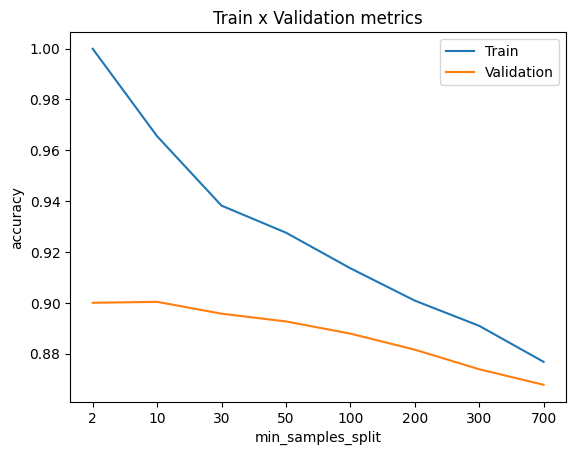

In [46]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
     model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
     predictions_train = model.predict(x_train)
     predictions_val = model.predict(x_test) 
     accuracy_train = accuracy_score(predictions_train,y_train)
     accuracy_val = accuracy_score(predictions_val,y_test)
     accuracy_list_train.append(accuracy_train)
     accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
     model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
     predictions_train = model.predict(x_train)
     predictions_val = model.predict(x_test) 
     accuracy_train = accuracy_score(predictions_train,y_train)
     accuracy_val = accuracy_score(predictions_val,y_test)
     accuracy_list_train.append(accuracy_train)
     accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

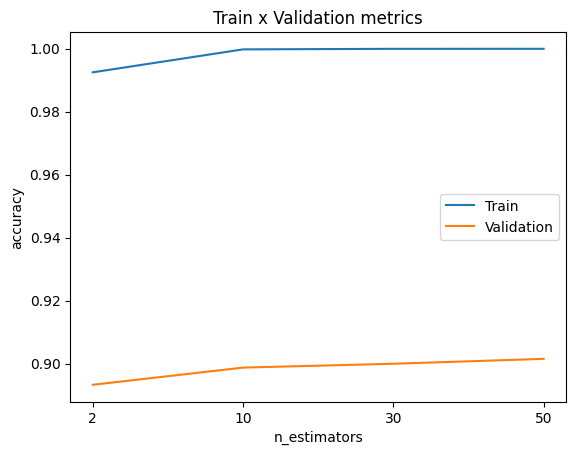

In [44]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
     model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
     predictions_train = model.predict(x_train)
     predictions_val = model.predict(x_test) 
     accuracy_train = accuracy_score(predictions_train,y_train)
     accuracy_val = accuracy_score(predictions_val,y_test)
     accuracy_list_train.append(accuracy_train)
     accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [47]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 200, 
                                             min_samples_split = 10).fit(x_train,y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9650
Metrics test:
	Accuracy score: 0.8958
